In [4]:
### load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

# scikit-learn
import xgboost
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Explainable AI
import shap

# 한글 폰트 설정
# plt.rcParams['font.family'] = 'NanumGothic'

In [14]:
### load example data
data = pd.read_csv('df_final.csv')

### rename data
data.columns = ["noneed", "sidocode","sidoname","sggname",
                "nbuild", "noneed2", "pyangho",
                "pwarning", "pheavy", "pwalking",
                "pstress", "pwork", "phardw",
                "rhousing", "rbuy","rfactory",
                "rgreen","noneed3","y","g"]

### remove not need column
data_use = data[data.columns.difference(['noneed','noneed2','noneed3','sidocode','sidoname','sggname',
                                         'g'])]
data_use = data_use.dropna(axis=0)

In [16]:
### train test select
X = data_use[data_use.columns.difference(['y'])]
y = data_use[["y"]]

In [17]:
# Xgboost 득점모델 학습
xgr = xgboost.XGBRegressor(random_state=0)

# Extratree 득점모델 학습
etr = ExtraTreesRegressor(random_state=0)

# 랜덤포레스트 득점모델 학습
rf = RandomForestRegressor(random_state=0)

In [18]:
# fitting
xgr.fit(X, y)
etr.fit(X, y)
rf.fit(X, y)

[15:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=0)

In [21]:
# train rmse
xgr_predict = xgr.predict(X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgr_predict, y))))

# train rmse
rf_predict = rf.predict(X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_predict, y))))

# train rmse
etr_predict = etr.predict(X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(etr_predict, y))))

RMSE':2.253640337337417
RMSE':2.240820546256221
RMSE':7.576051406755093e-14


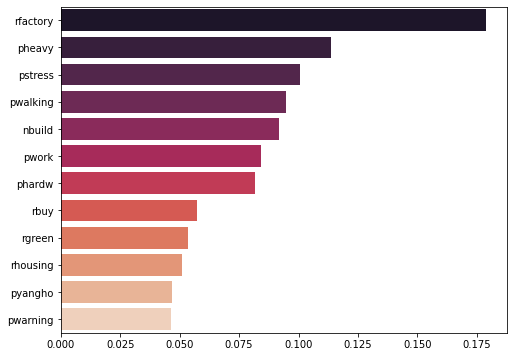

In [22]:
### feature importance
%matplotlib inline
 
ftr_importances_values = etr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()


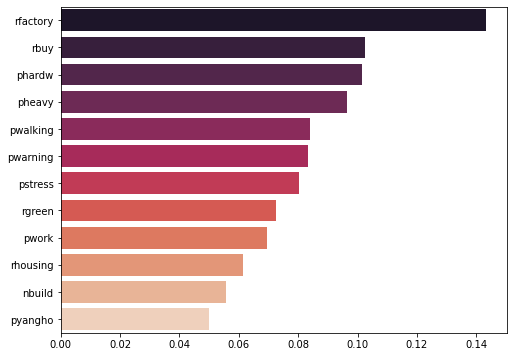

In [27]:
### feature importance
%matplotlib inline
 
ftr_importances_values = xgr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()

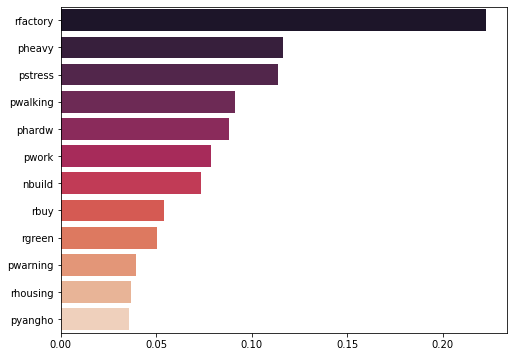

In [26]:
### feature importance
%matplotlib inline
 
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index, palette = 'rocket')
plt.show()